In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [12]:
transform= transforms.ToTensor()    # convert to tensor

# transform=transforms.Compose([
#     transforms.ToTensor(),
#     transforms.Normalize((0.5), (0.5)) ])   ### see the last image value[-1,1]

mnist_data= datasets.MNIST(root='./data', train=True, download=True, transform=transform)
data_loader= torch.utils.data.DataLoader(dataset=mnist_data, batch_size=64, shuffle=True)

In [13]:
print(mnist_data.data.size())

torch.Size([60000, 28, 28])


In [4]:
dataiter=iter(data_loader)
images, labels=dataiter.next()
print(torch.min(images), torch.max(images))

tensor(0.) tensor(1.)


In [70]:
class Autoencoder_Linear(nn.Module):
    def __init__(self):
        super().__init__()
        #N = batch_size, 784= Image_size
        self.encoder= nn.Sequential(
            nn.Linear(28*28, 128),    # N, 784 -->N, 128
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 12),
            nn.ReLU(),
            nn.Linear(12, 3)           # --> N, 3
            )      
        
        self.decoder= nn.Sequential(
            nn.Linear(3, 12),    # --> N, 
            nn.ReLU(),
            nn.Linear(12, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28*28),   # --> N, 784
            nn.Sigmoid()
            )      
        
    def forward(self, x):
        encoder=self.encoder(x)
        decoded =self.decoder(encoder)
        return decoded
    # Note: last image_size [-1,1]-->nn.Tanh

In [71]:
model=Autoencoder_Linear()
print(model)

Autoencoder_Linear(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=12, bias=True)
    (5): ReLU()
    (6): Linear(in_features=12, out_features=3, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=3, out_features=12, bias=True)
    (1): ReLU()
    (2): Linear(in_features=12, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=128, bias=True)
    (5): ReLU()
    (6): Linear(in_features=128, out_features=784, bias=True)
    (7): Sigmoid()
  )
)


In [72]:
criterion= nn.MSELoss()
optimizer=torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)


In [73]:
# for Autoencoder_ Linear

num_epochs= 5
outputs=[]
for epoch in range(num_epochs):
    for (img, _) in data_loader:
    #for i,(img, _) in enumerate(data_loader):
        img=img.reshape(-1, 28*28)            # img= [64, 784]
       
        recon= model(img)   # recon= [64,784]
       
        
        loss=criterion(recon, img)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
      
    print(f'Epoch: {epoch+1}, Loss:{loss.item():.4f}')
    outputs.append((epoch, img, recon))

Epoch: 1, Loss:0.0556
Epoch: 2, Loss:0.0411
Epoch: 3, Loss:0.0388
Epoch: 4, Loss:0.0435
Epoch: 5, Loss:0.0359


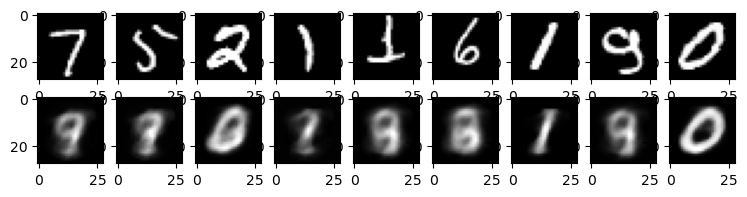

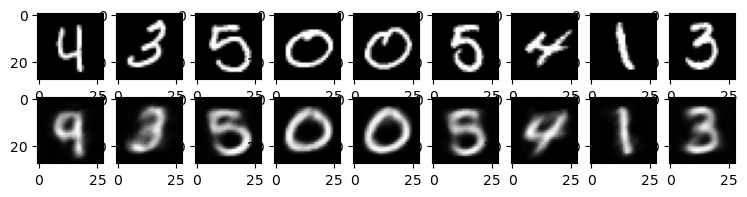

In [74]:
# Draw Picture for Autoencoder_Linear
for k in range (0, num_epochs, 4):
    plt.figure(figsize=(9,2))
    plt.gray()
    imgs=outputs[k][1].detach().numpy()   # convert torch to numpy
    recon= outputs[k][2].detach().numpy()
    
    for i, item in enumerate(imgs):
            if i>=9: break
            plt.subplot(2, 9, i+1)
            item=item.reshape(-1, 28, 28)    # item= 1, 28, 28
            plt.imshow(item[0])
    
    for i, item in enumerate(recon):
            if i>=9: break
            plt.subplot(2, 9, 9+i+1)   #row_length +1+1
            item=item.reshape(-1, 28, 28)    # item= 1, 28, 28
            plt.imshow(item[0])

# CNN model

In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [21]:
transform= transforms.ToTensor()    # convert to tensor

# transform=transforms.Compose([
#     transforms.ToTensor(),
#     transforms.Normalize((0.5), (0.5)) ])   ### see the last image value[-1,1]

mnist_data= datasets.MNIST(root='./data', train=True, download=True, transform=transform)
data_loader= torch.utils.data.DataLoader(dataset=mnist_data, batch_size=64, shuffle=True)

In [22]:
print(mnist_data.data.size())

torch.Size([60000, 28, 28])


In [23]:
dataiter=iter(data_loader)
images, labels=dataiter.next()
print(torch.min(images), torch.max(images))

tensor(0.) tensor(1.)


In [24]:
criterion= nn.MSELoss()
optimizer=torch.optim.Adam(model_CNN.parameters(), lr=1e-3, weight_decay=1e-5)


In [25]:
class Autoencoder_CNN(nn.Module):
    def __init__(self):
        super().__init__()
        # N = batch_size,  Image_size= 1,28,28
        # N,1,28,28
        self.encoder= nn.Sequential(
            nn.Conv2d(1, 16, 3, stride=2, padding=1),    # N, 16, 14, 14
            nn.ReLU(),
            nn.Conv2d(16, 32, 3, stride=2, padding=1),   # N, 32, 7, 7
            nn.ReLU(),
            nn.Conv2d(32, 64, 7)      # N, 64, 1, 1
            ) 
        
        # N, 64, 1, 1
        self.decoder= nn.Sequential(
            nn.ConvTranspose2d(64, 32, 7),    # --> N, 32, 7,7  
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1, output_padding= 1),    # N,16, 14, 14 
            nn.ReLU(),
            nn.ConvTranspose2d(16, 1, 3, stride=2, padding=1, output_padding= 1),    # N,1, 28, 28 
            nn.Sigmoid()
            )      
        
    def forward(self, x):
        encoder=self.encoder(x)
        decoded =self.decoder(encoder)
        return decoded

# Note: last image_size [-1,1]-->nn.Tanh
# nn.MaxPool2d--> nn.MaxUnpool2d

In [26]:
model_CNN=Autoencoder_CNN()
print(model_CNN)


Autoencoder_CNN(
  (encoder): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (3): ReLU()
    (4): Conv2d(32, 64, kernel_size=(7, 7), stride=(1, 1))
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(64, 32, kernel_size=(7, 7), stride=(1, 1))
    (1): ReLU()
    (2): ConvTranspose2d(32, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (3): ReLU()
    (4): ConvTranspose2d(16, 1, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (5): Sigmoid()
  )
)


In [28]:
# for Autoencoder_ CNN

num_epochs= 10
outputs=[]
for epoch in range(num_epochs):
    #for (img, _) in data_loader:
    for i,(img, _) in enumerate(data_loader):
        recon= model_CNN(img)   # recon= [64,784]
       
        
        loss=criterion(recon, img)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    print(f'Epoch: {epoch+1}, Loss:{loss.item():.4f}')
    outputs.append((epoch, img, recon))

Epoch: 1, Loss:0.2616
Epoch: 2, Loss:0.2599
Epoch: 3, Loss:0.2600
Epoch: 4, Loss:0.2617
Epoch: 5, Loss:0.2622
Epoch: 6, Loss:0.2608
Epoch: 7, Loss:0.2601
Epoch: 8, Loss:0.2614
Epoch: 9, Loss:0.2603
Epoch: 10, Loss:0.2596


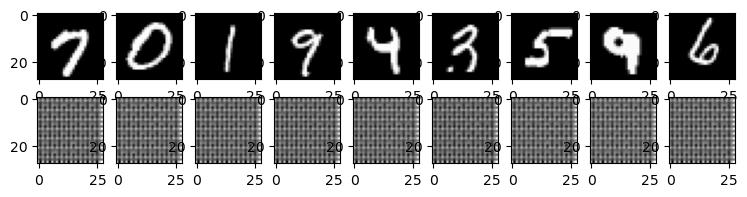

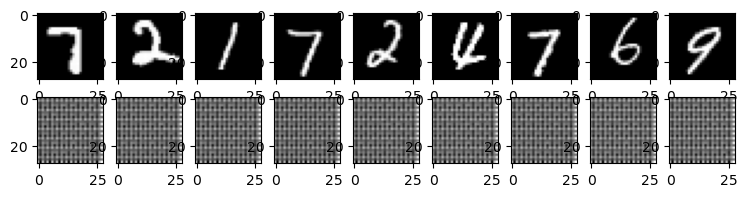

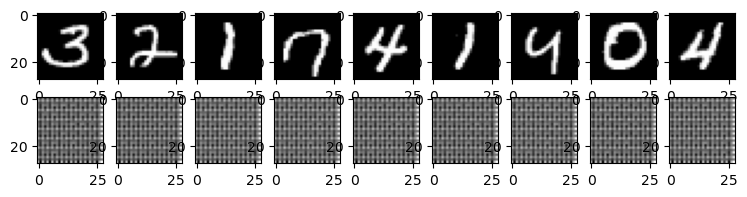

In [29]:
# Autoencode_CNN
for k in range (0, num_epochs, 4):
    plt.figure(figsize=(9,2))
    plt.gray()
    imgs=outputs[k][1].detach().numpy()   # convert torch to numpy
    recon= outputs[k][2].detach().numpy()
    
    for i, item in enumerate(imgs):
            if i>=9: break
            plt.subplot(2, 9, i+1)
           
            plt.imshow(item[0])
    
    for i, item in enumerate(recon):
            if i>=9: break
            plt.subplot(2, 9, 9+i+1)   #row_length +1+1
            
            plt.imshow(item[0])